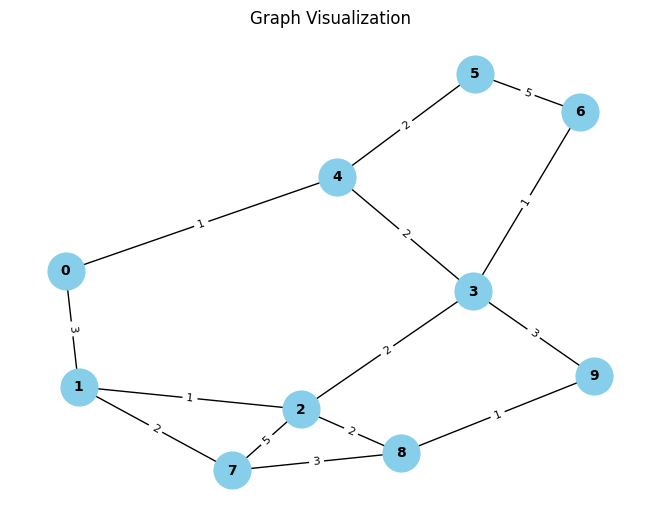

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from tkinter import Tk, simpledialog, messagebox

def generate_graph(adjacency_matrix):
    # Create an empty graph
    G = nx.Graph()

    # Add edges to the graph based on the adjacency matrix
    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] != 0:  # Add edge only if weight is non-zero
                G.add_edge(i, j, weight=adjacency_matrix[i][j])

    return G

def visualize_graph(G, shortest_path=None, pos=None):
    # Get edge weights for visualization
    edge_labels = nx.get_edge_attributes(G, 'weight')
    
    # If positions are not already computed, compute them
    if pos is None:
        pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    # Highlight the shortest path, if provided
    if shortest_path:
        path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='yellow', node_size=800)

    # Display the graph
    plt.title("Graph Visualization")
    plt.show()

def find_shortest_path(G, source, target):
    try:
        # Use Dijkstra's algorithm to find the shortest path
        shortest_path = nx.dijkstra_path(G, source=source, target=target, weight='weight')
        return shortest_path
    except nx.NetworkXNoPath:
        return None

def main():
    # Adjacency matrix input
    adjacency_matrix = [
        [0, 3, 0, 0, 1, 0, 0, 0, 0, 0],
        [3, 0, 1, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 2, 0, 0, 0, 5, 2, 0],
        [0, 0, 2, 0, 2, 0, 1, 0, 0, 3],
        [1, 0, 0, 2, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 5, 0, 0, 0],
        [0, 0, 0, 1, 0, 5, 0, 0, 0, 0],
        [0, 2, 5, 0, 0, 0, 0, 0, 3, 0],
        [0, 0, 2, 0, 0, 0, 0, 3, 0, 1],
        [0, 0, 0, 3, 0, 0, 0, 0, 1, 0],
    ]

    # Generate the graph
    G = generate_graph(adjacency_matrix)
    pos = nx.spring_layout(G)  # Precompute positions for consistency in visualization

    # Initial graph display
    visualize_graph(G, pos=pos)

    # Create a dialog box for user input
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window

    try:
        source = simpledialog.askinteger("Input", "Enter the source node (0-9):", minvalue=0, maxvalue=9)
        destination = simpledialog.askinteger("Input", "Enter the destination node (0-9):", minvalue=0, maxvalue=9)

        if source is None or destination is None:
            messagebox.showinfo("Cancelled", "Operation cancelled by the user.")
            return

        # Find the shortest path
        shortest_path = find_shortest_path(G, source, destination)

        if shortest_path:
            messagebox.showinfo("Shortest Path", f"The shortest path is: {shortest_path}")
            visualize_graph(G, shortest_path=shortest_path, pos=pos)
        else:
            messagebox.showwarning("No Path", f"No path exists between node {source} and node {destination}.")

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

if __name__ == "__main__":
    main()
